In [1]:
import pandas as pd
import json
import os

In [35]:
track_rows = []

for i in range(50):
    file_path = f"D:\\Yasmin\\Study\\Spotify_Data\\mpd.slice.{i*1000}-{i*1000+999}.json"
    
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist. Skipping.")
        continue
    
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        playlists = data.get("playlists", [])
        for playlist in playlists:
            for track in playlist.get("tracks", []):
                track_row = {
                    "playlist_name": playlist.get("name", ""),
                    "collaborative": playlist.get("collaborative", False),
                    "pid": playlist.get("pid", ""),
                    "modified_at": playlist.get("modified_at", ""),
                    "num_tracks": playlist.get("num_tracks", 0),
                    "num_albums": playlist.get("num_albums", 0),
                    "num_followers": playlist.get("num_followers", 0),
                    "num_edits": playlist.get("num_edits", 0),
                    "track_pos": track.get("pos", 0),
                    "artist_name": track.get("artist_name", ""),
                    "track_uri": track.get("track_uri", ""),
                    "artist_uri": track.get("artist_uri", ""),
                    "track_name": track.get("track_name", ""),
                    "album_uri": track.get("album_uri", ""),
                    "duration_ms": track.get("duration_ms", 0),
                    "album_name": track.get("album_name", ""),
                    "num_artists": playlist.get("num_artists", 0)
                }
                track_rows.append(track_row)
    
    except (json.JSONDecodeError, IOError) as e:
        print(f"Error processing file {file_path}: {e}")

df = pd.DataFrame(track_rows)
csv_file = 'Spotify_Million.csv'
df.to_csv(csv_file, index=False)

print(f"CSV file has been created successfully: {csv_file}")


CSV file has been created successfully: Spotify_Million.csv


In [2]:
data=pd.read_csv("Spotify_Million.csv")
data

,playlist_name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,track_pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,num_artists
0,Throwbacks,False,0,1493424000,52,47,1,6,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,37
1,Throwbacks,False,0,1493424000,52,47,1,6,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,37
2,Throwbacks,False,0,1493424000,52,47,1,6,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),37
3,Throwbacks,False,0,1493424000,52,47,1,6,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,37
4,Throwbacks,False,0,1493424000,52,47,1,6,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344369,BOOL,False,49999,1488412800,11,9,1,5,6,Kirko Bangz,spotify:track:3m8CQnnfJJp4eQMWWl3zay,spotify:artist:2r8r62VGJKGi463aH1HJUZ,Drank In My Cup,spotify:album:7tivRA9WDD0rWVazWm2pFS,232160,Drank In My Cup,8
3344370,BOOL,False,49999,1488412800,11,9,1,5,7,Birdman,spotify:track:3fGdMnnyM51PIuSyBJtX7w,spotify:artist:35sCXuy5gN6Or69rZ9vqBs,I Get Money,spotify:album:1IQpFrzC32O0wJYTnSZa2u,266386,I Get Money,8
3344371,BOOL,False,49999,1488412800,11,9,1,5,8,The Chainsmokers,spotify:track:6RUKPb4LETWmmr3iAEQktW,spotify:artist:69GGBxA162lTqCwzJG5jLp,Something Just Like This,spotify:album:4JPguzRps3kuWDD5GS6oXr,247160,Memories...Do Not Open,8
3344372,BOOL,False,49999,1488412800,11,9,1,5,9,Kodak Black,spotify:track:4Q3N4Ct4zCuIHuZ65E3BD4,spotify:artist:46SHBwWsqBkxI7EeeBEQG7,Tunnel Vision,spotify:album:5mG8oNkNKM2my7t9ywra96,268186,Painting Pictures,8


In [6]:
data.info()
# before chaging modified_at to date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344374 entries, 0 to 3344373
Data columns (total 19 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   name           object
 1   collaborative  bool  
 2   pid            int64 
 3   modified_at    int64 
 4   num_tracks     int64 
 5   num_albums     int64 
 6   num_followers  int64 
 7   num_edits      int64 
 8   duration_ms    int64 
 9   num_artists    int64 
 10  description    object
 11  pos            int64 
 12  artist_name    object
 13  track_uri      object
 14  artist_uri     object
 15  track_name     object
 16  album_uri      object
 17  duration_ms.1  int64 
 18  album_name     object
dtypes: bool(1), int64(10), object(8)
memory usage: 462.5+ MB


In [37]:
data['modified_at'] = pd.to_datetime(data['modified_at'],unit='s')


In [38]:
# convert duration_ms to minutes

data['duration_m'] = data['duration_ms'] / 60000


In [39]:
data['Release_year'] = data['modified_at'].dt.year

In [40]:
data

,playlist_name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,track_pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,num_artists,duration_m,Release_year
0,Throwbacks,False,0,2017-04-29,52,47,1,6,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,37,3.781050,2017
1,Throwbacks,False,0,2017-04-29,52,47,1,6,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,37,3.313333,2017
2,Throwbacks,False,0,2017-04-29,52,47,1,6,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),37,3.932217,2017
3,Throwbacks,False,0,2017-04-29,52,47,1,6,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,37,4.454433,2017
4,Throwbacks,False,0,2017-04-29,52,47,1,6,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,37,3.793333,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344369,BOOL,False,49999,2017-03-02,11,9,1,5,6,Kirko Bangz,spotify:track:3m8CQnnfJJp4eQMWWl3zay,spotify:artist:2r8r62VGJKGi463aH1HJUZ,Drank In My Cup,spotify:album:7tivRA9WDD0rWVazWm2pFS,232160,Drank In My Cup,8,3.869333,2017
3344370,BOOL,False,49999,2017-03-02,11,9,1,5,7,Birdman,spotify:track:3fGdMnnyM51PIuSyBJtX7w,spotify:artist:35sCXuy5gN6Or69rZ9vqBs,I Get Money,spotify:album:1IQpFrzC32O0wJYTnSZa2u,266386,I Get Money,8,4.439767,2017
3344371,BOOL,False,49999,2017-03-02,11,9,1,5,8,The Chainsmokers,spotify:track:6RUKPb4LETWmmr3iAEQktW,spotify:artist:69GGBxA162lTqCwzJG5jLp,Something Just Like This,spotify:album:4JPguzRps3kuWDD5GS6oXr,247160,Memories...Do Not Open,8,4.119333,2017
3344372,BOOL,False,49999,2017-03-02,11,9,1,5,9,Kodak Black,spotify:track:4Q3N4Ct4zCuIHuZ65E3BD4,spotify:artist:46SHBwWsqBkxI7EeeBEQG7,Tunnel Vision,spotify:album:5mG8oNkNKM2my7t9ywra96,268186,Painting Pictures,8,4.469767,2017


In [11]:
data.info()
# after chaging modified_at to date and duration_ms to time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344374 entries, 0 to 3344373
Data columns (total 20 columns):
 #   Column         Dtype         
---  ------         -----         
 0   name           object        
 1   collaborative  bool          
 2   pid            int64         
 3   modified_at    datetime64[ns]
 4   num_tracks     int64         
 5   num_albums     int64         
 6   num_followers  int64         
 7   num_edits      int64         
 8   duration_ms    float64       
 9   num_artists    int64         
 10  description    object        
 11  pos            int64         
 12  artist_name    object        
 13  track_uri      object        
 14  artist_uri     object        
 15  track_name     object        
 16  album_uri      object        
 17  duration_ms.1  int64         
 18  album_name     object        
 19  Release_year   int32         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(8), object(8)
memory usage: 475.2+ MB


<Axes: >

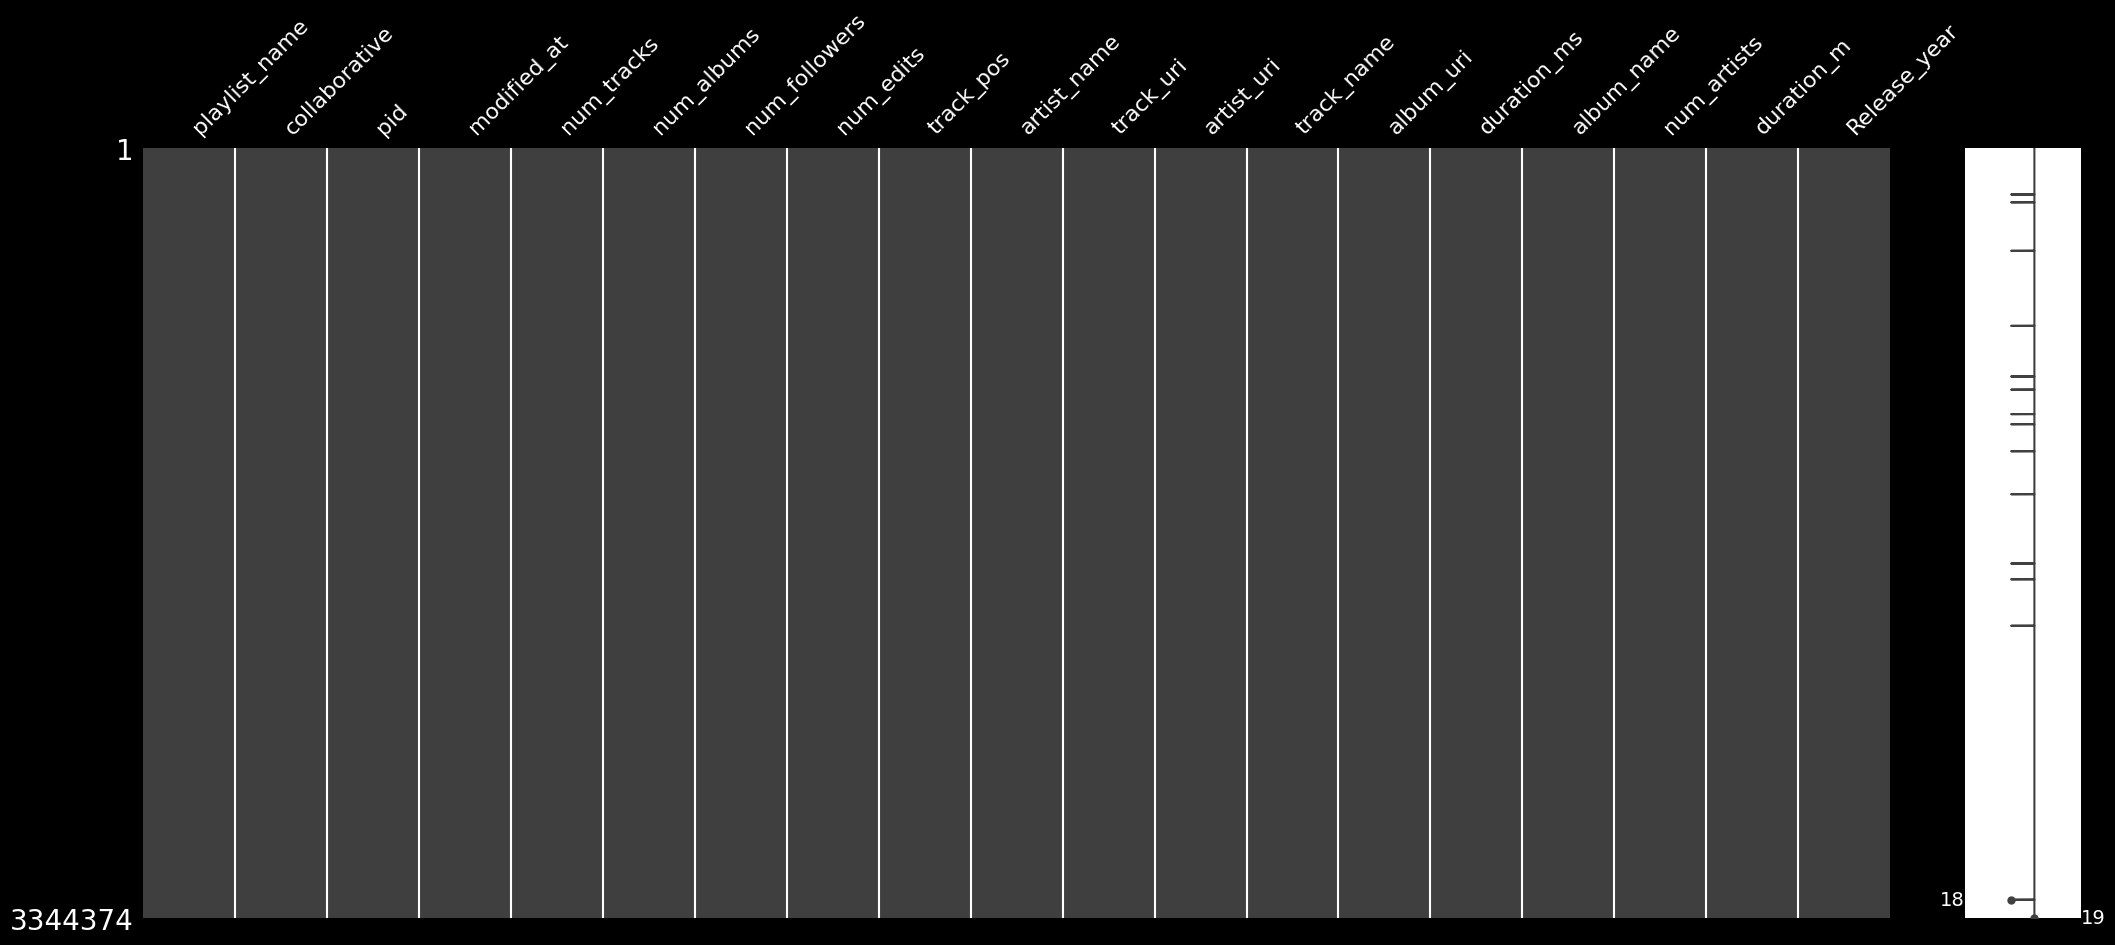

In [41]:
import missingno as msno
msno.matrix(data) 

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [42]:
# max number of followers

data['num_followers'].max()

15842

In [43]:
data['num_tracks'].max()


250

In [44]:
data['num_tracks'].min()


5

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import math
followers_per_track = data.groupby('track_name')['num_followers'].sum().reset_index()

average_followers_per_track = followers_per_track['num_followers'].mean()
average_followers_per_track_ceiling = math.ceil(average_followers_per_track)
print(f"The average number of followers per track is: {average_followers_per_track_ceiling}")

The average number of followers per track is: 30


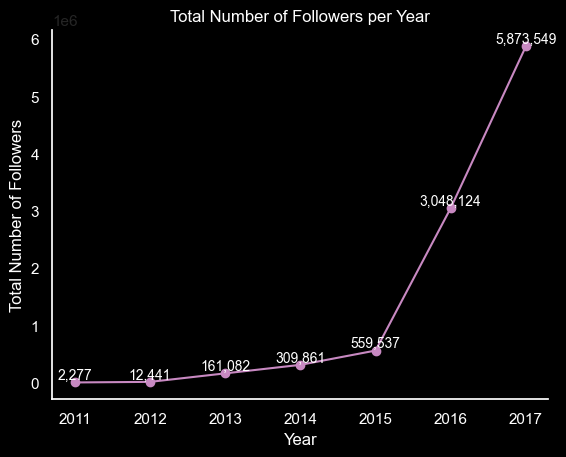

In [71]:
sns.set()
sns.set_style('dark')
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')  # Set the figure background color
ax.set_facecolor('black') 
followers_per_year = data.groupby('Release_year')['num_followers'].sum().reset_index()
most_followers_year = followers_per_year.sort_values(by='num_followers', ascending=False).iloc[0]

plt.plot(followers_per_year['Release_year'], followers_per_year['num_followers'], marker='o', color='#c889c2', linestyle='-')

for i, row in followers_per_year.iterrows():
    plt.text(row['Release_year'], row['num_followers'], f'{int(row["num_followers"]):,}', 
             ha='center',  
             va='bottom',
             fontsize=10,
             color='white')

plt.xlabel('Year',color='white')
plt.ylabel('Total Number of Followers',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.title('Total Number of Followers per Year',color='white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

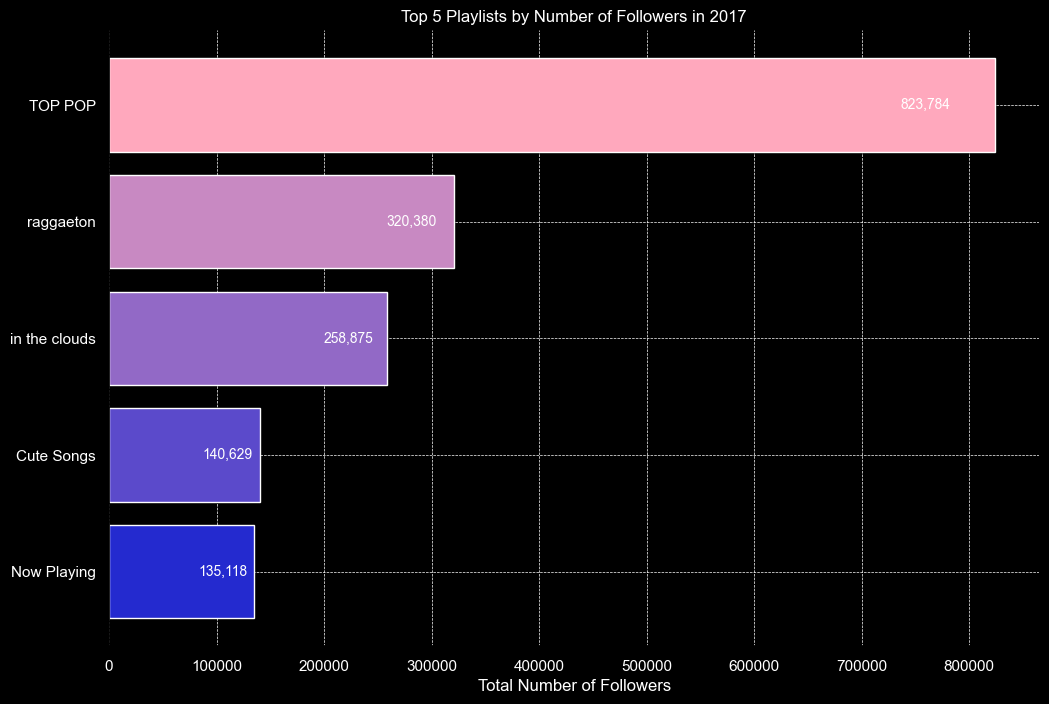

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('dark')

colors = ["#ffa8bd", '#c889c2', '#9269c6', '#5b4acb', '#242acf']

data_2017 = data[data['Release_year'] == 2017]
followers_per_playlist = data_2017.groupby('name')['num_followers'].sum().reset_index()
top_playlists = followers_per_playlist.sort_values(by='num_followers', ascending=False).head(5)
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
bars = plt.barh(top_playlists['name'], top_playlists['num_followers'], color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width - width * 0.05, bar.get_y() + bar.get_height() / 2,  # Position of the text
             f'{int(width):,}',
             ha='right',
             va='center',
             color='white',
             fontsize=10) 

plt.xlabel('Total Number of Followers', color='white')
plt.title('Top 5 Playlists by Number of Followers in 2017', color='white')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.gca().invert_yaxis()

plt.show()


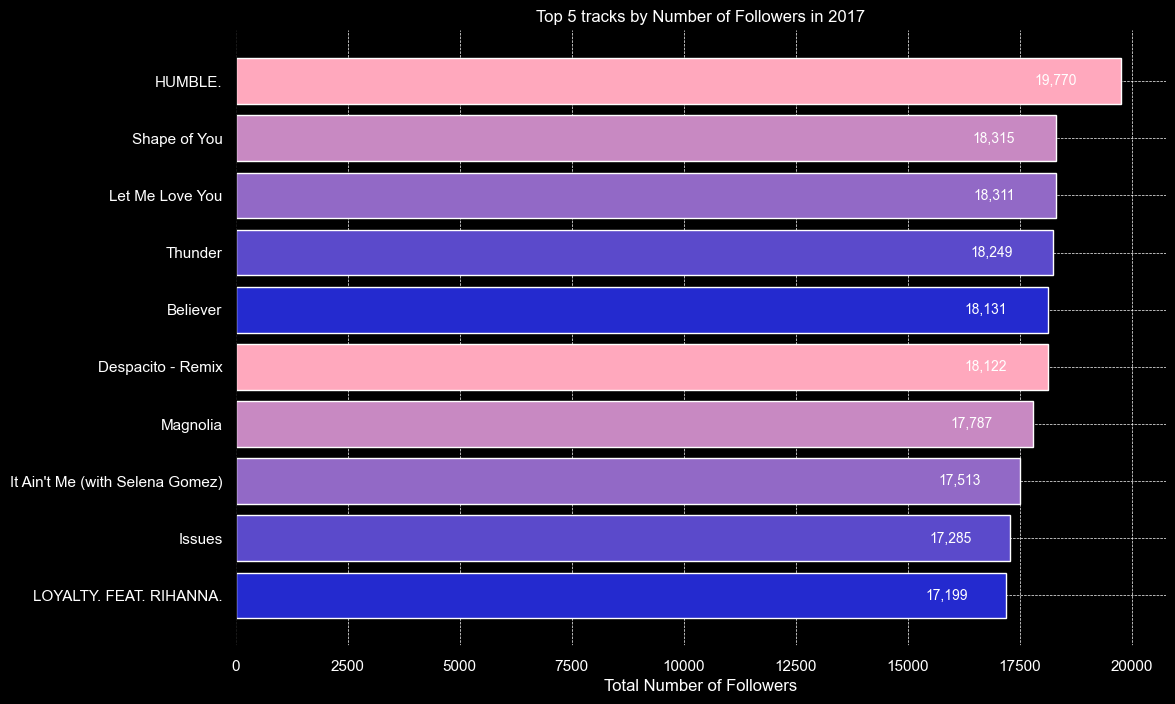

In [41]:
sns.set()
sns.set_style('dark')

colors = ["#ffa8bd", '#c889c2', '#9269c6', '#5b4acb', '#242acf']
data_2017 = data[data['Release_year'] == 2017]

followers_per_playlist = data_2017.groupby('track_name')['num_followers'].sum().reset_index()
top_tracks = followers_per_playlist.sort_values(by='num_followers', ascending=False).head(10)
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
bars = plt.barh(top_tracks['track_name'], top_tracks['num_followers'], color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width - width * 0.05, bar.get_y() + bar.get_height() / 2,  # Position of the text
             f'{int(width):,}',
             ha='right',
             va='center',
             color='white',
             fontsize=10) 

plt.xlabel('Total Number of Followers', color='white')
plt.title('Top 10 tracks by Number of Followers in 2017', color='white')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.gca().invert_yaxis()

plt.show()

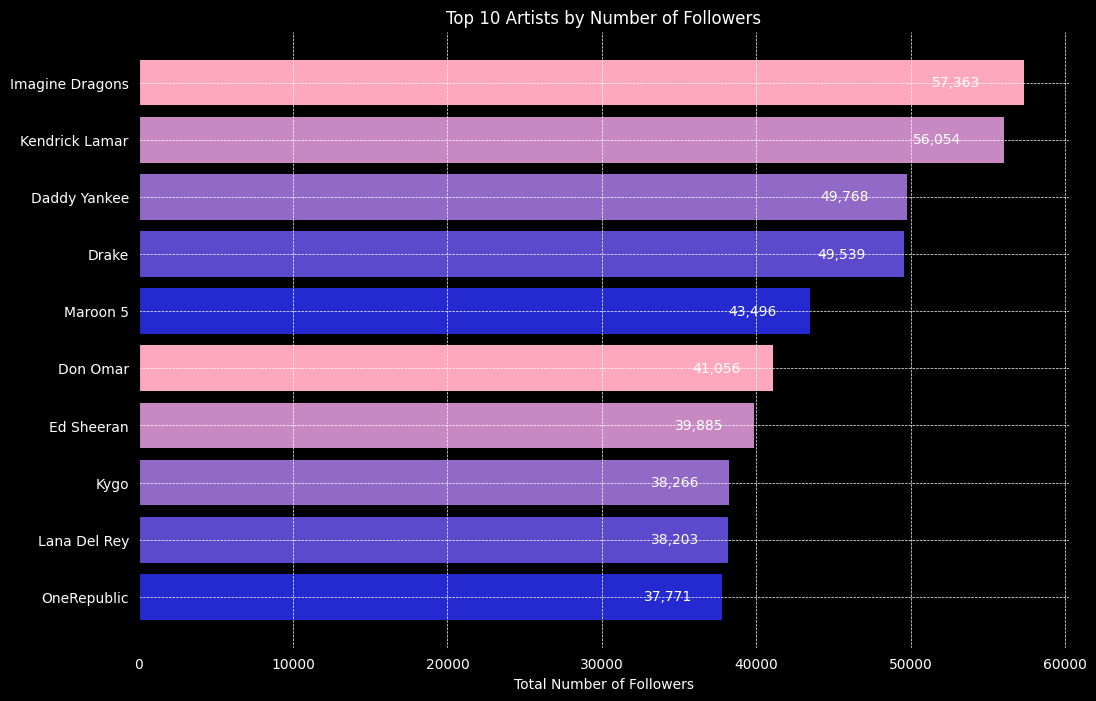

In [51]:
import matplotlib.pyplot as plt
colors = ["#ffa8bd",'#c889c2','#9269c6','#5b4acb','#242acf']

data_2017 = data[data['Release_year'] == 2017]
followers_per_track = data_2017.groupby('artist_name')['num_followers'].sum().reset_index()
top_tracks = followers_per_track.sort_values(by='num_followers', ascending=False).head(10)
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
bars = plt.barh(top_tracks['artist_name'], top_tracks['num_followers'], color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width - width * 0.05, bar.get_y() + bar.get_height() / 2, 
             f'{int(width):,}',
             ha='right',
             va='center',
             color='white',
             fontsize=10) 

plt.xlabel('Total Number of Followers', color='white')
plt.title('Top 10 Artists by Number of Followers', color='white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.gca().invert_yaxis()

plt.show()


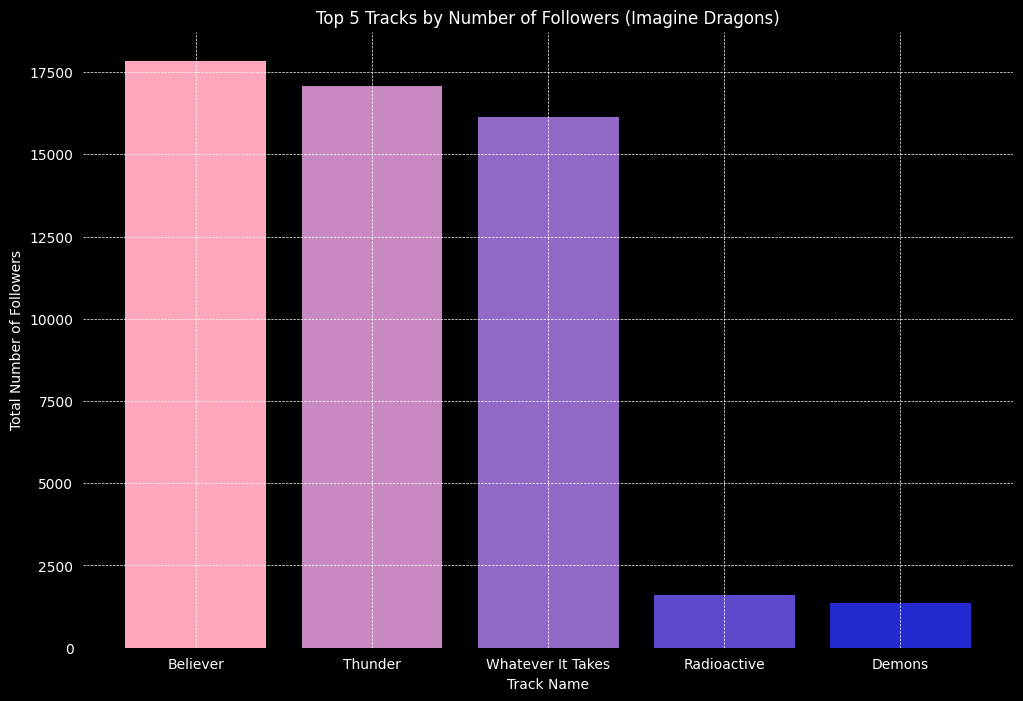

In [5]:
import matplotlib.pyplot as plt

colors = ["#ffa8bd", '#c889c2', '#9269c6', '#5b4acb', '#242acf']

data_artist = data[data['artist_name'] == 'Imagine Dragons']
followers_per_track = data_artist.groupby('track_name')['num_followers'].sum().reset_index()
top_tracks = followers_per_track.sort_values(by='num_followers', ascending=False).head(5)

plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

bars = plt.bar(top_tracks['track_name'], top_tracks['num_followers'], color=colors)
plt.xlabel('Track Name', color='white')
plt.ylabel('Total Number of Followers', color='white')
plt.title('Top 5 Tracks by Number of Followers (Imagine Dragons)', color='white')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(color='white', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


In [44]:
data["modified_at"].min()

Timestamp('2011-07-14 00:00:00')

In [45]:
data["modified_at"].max()

Timestamp('2017-11-01 00:00:00')

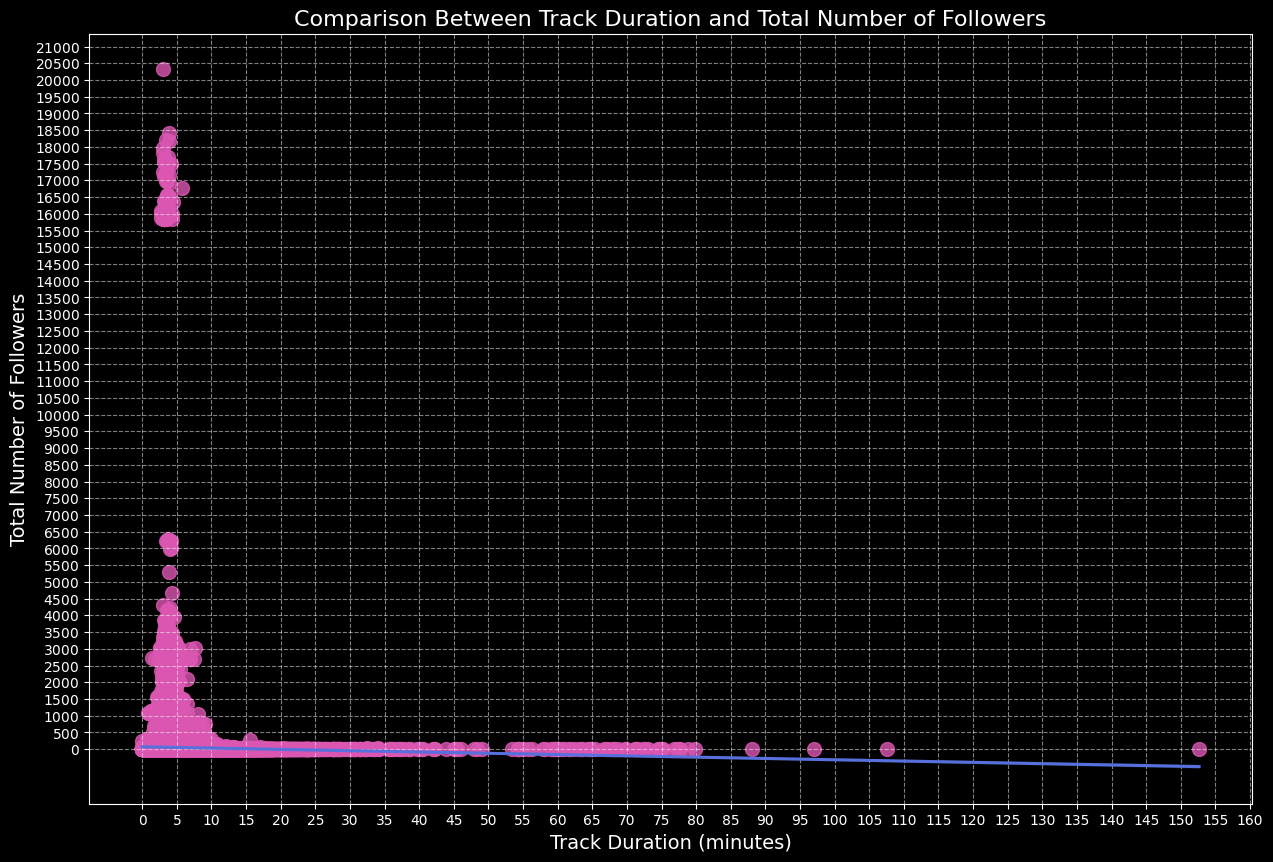

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

data_2017 = data[data['Release_year'] == 2017]
track_data = data_2017.groupby('duration_m').agg({'num_followers': 'sum'}).reset_index()

# Set up the figure dimensions
fig, ax = plt.subplots(figsize=(15, 10))

# Scatter plot of the relationship between track duration and the total number of followers
sns.regplot(data=track_data, x='duration_m', y='num_followers', 
            scatter_kws={'s': 100, 'color': '#db57b2'}, 
            line_kws={'color': '#5770db'}, ax=ax)

# Set labels and title
ax.set_xlabel('Track Duration (minutes)', fontsize=14, color='white')
ax.set_ylabel('Total Number of Followers', fontsize=14, color='white')
ax.set_title('Comparison Between Track Duration and Total Number of Followers', fontsize=16, color='white')

# Customize the plot appearance
ax.set_facecolor('#000000')
fig.patch.set_facecolor('#000000')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.5, color='white')

# Set x-axis ticks to include 0, 5, 10, 15, ..., 160
ax.set_xticks(range(0, 165, 5))
ax.set_yticks(range(0,21001,500))
# Use scientific notation for the y-axis if needed
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=True))

# Set the color of y-axis numbers to white
ax.tick_params(axis='y', colors='white')

# Display the plot
plt.show()

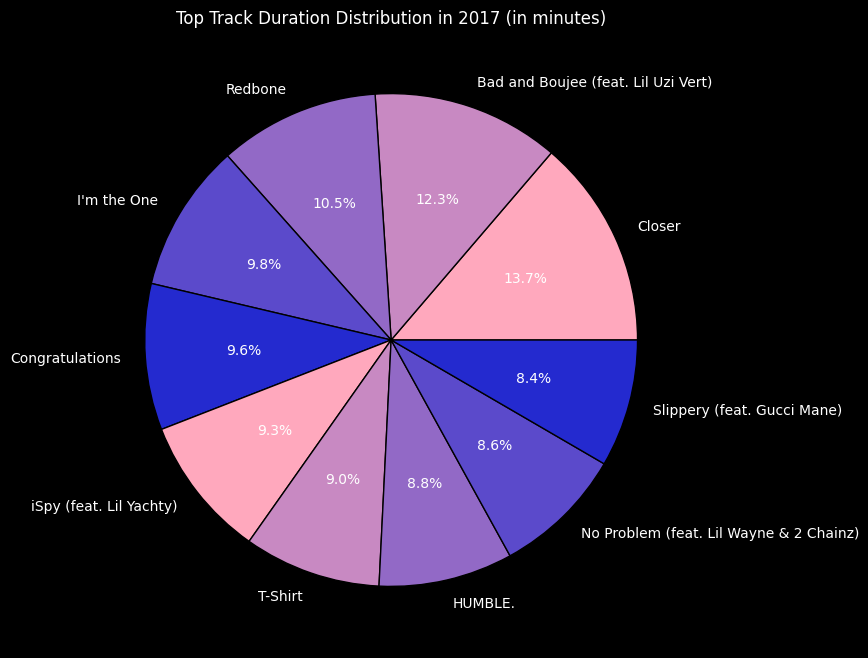

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data
# data = pd.read_csv('your_data.csv')  # Load your data here
data_2017 = data[data['Release_year'] == 2017]
colors = ["#ffa8bd",'#c889c2','#9269c6','#5b4acb','#242acf']

track_duration_sum = data_2017.groupby('track_name')['duration_m'].sum().reset_index()

# Sort by duration and select the top N tracks
top_n = 10  # Adjust as needed
track_duration_sum = track_duration_sum.nlargest(top_n, 'duration_m')

# Set up the colors for the pie chart
colors = sns.color_palette(colors, len(track_duration_sum))

# Create the pie chart with a black background
plt.figure(figsize=(12, 8), facecolor='black')  # Set the figure background color to black
ax = plt.gca()
ax.set_facecolor('black')  # Set the axes background color to black

# Plot the pie chart
wedges, texts, autotexts = plt.pie(track_duration_sum['duration_m'], 
                                   labels=track_duration_sum['track_name'],
                                   autopct='%1.1f%%', 
                                   colors=colors,
                                   wedgeprops={'edgecolor': 'black'})  # Adds a border around each wedge for contrast

# Customize text colors to be visible on black background
plt.title('Top Track Duration Distribution in 2017 (in minutes)', color='white')

# Change the color of the pie chart text and percentages
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

# Display the plot
plt.show()
